In [26]:
#load dataset
import numpy as np
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

In [27]:
#exercise a 
import numpy as np


def polynomial_features(x, p, intercept=True):
    n = len(x)
    if intercept:
        X = np.zeros((n, p+1))
        for j in range(p+1):
            X[:, j] = x**j
    else:
        X = np.zeros((n, p))
        for j in range(1, p+1):
            X[:, j-1] = x**j
    return X

def test_polynomial_features():
    x = np.array([1, 2, 3])
    #intercept
    assert np.allclose(
        polynomial_features(x, 2, intercept=True),
        np.array([[1, 1, 1],
                  [1, 2, 4],
                  [1, 3, 9]])
    )
    #no intercept
    assert np.allclose(
        polynomial_features(x, 2, intercept=False),
        np.array([[1, 1],
                  [2, 4],
                  [3, 9]])
    )
    print("polynomial intercept tests passed")    
test_polynomial_features()

polynomial intercept tests passed


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = polynomial_features(x, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)


In [29]:
#exercise 4a - implement a function for computing the optimal weights for ridge regression
def ridge_parameters(X, y, lam):
    n, m = X.shape
    I = np.eye(m)
    w = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return w


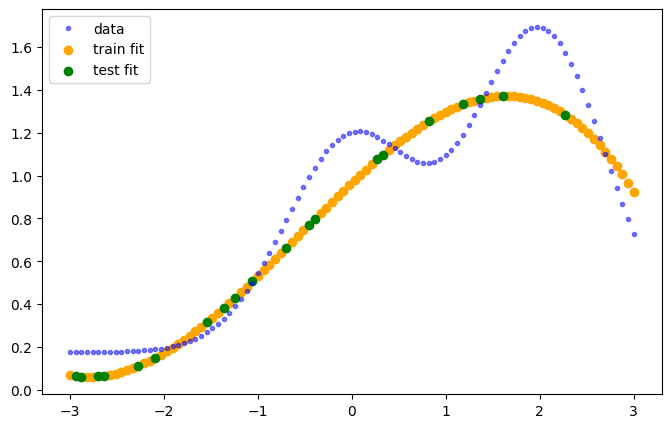

In [30]:
import matplotlib.pyplot as plt
#split data again
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#build after splitting
X_train = polynomial_features(x_train, 3, intercept=False)
X_test  = polynomial_features(x_test, 3, intercept=False)

#scale after splitting
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# ridge 
lam = 1.0
beta = ridge_parameters(X_train_s, y_train, lam)

# predict
y_pred_train = X_train_s @ beta + y_offset
y_pred_test  = X_test_s @ beta + y_offset

# plot
plt.figure(figsize=(8,5))
plt.plot(x, y, 'b.', alpha=0.5, label="data")
plt.scatter(x_train, y_pred_train, color="orange", label="train fit")
plt.scatter(x_test, y_pred_test, color="green", label="test fit")
plt.legend()
plt.show()


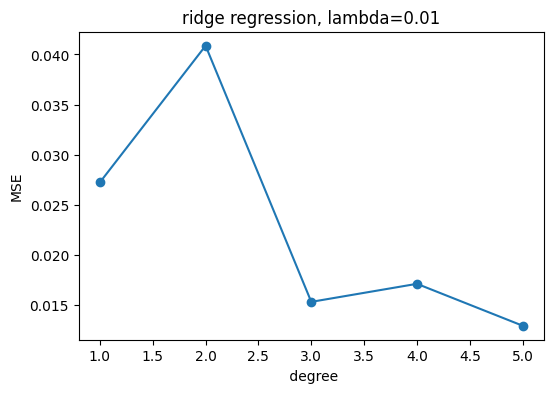

In [31]:
from sklearn.metrics import mean_squared_error

degrees = range(1, 6)
mse_vals = []

for d in degrees:
    X_train = polynomial_features(x_train, d, intercept=False)
    X_test  = polynomial_features(x_test, d, intercept=False)

    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    lam = 0.01
    beta = ridge_parameters(X_train_s, y_train, lam)

    # predict and MSE
    y_pred_test = X_test_s @ beta + y_offset
    mse_vals.append(mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(6,4))
plt.plot(degrees, mse_vals, marker='o')
plt.xlabel(" degree")
plt.ylabel("MSE")
plt.title("ridge regression, lambda=0.01")
plt.show()


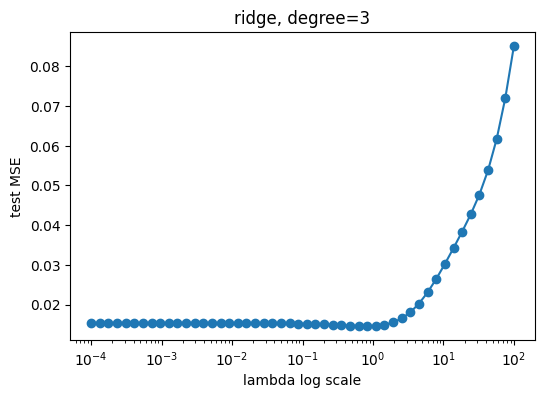

In [32]:
# (b) ridge regression, degree=3, vary lambda
lambdas = np.logspace(-4, 2, 50)   # from 1e-4 to 1e2
mse_vals = []

for lam in lambdas:
    X_train = polynomial_features(x_train, 3, intercept=False)
    X_test  = polynomial_features(x_test, 3, intercept=False)

    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    beta = ridge_parameters(X_train_s, y_train, lam)

    y_pred_test = X_test_s @ beta + y_offset
    mse_vals.append(mean_squared_error(y_test, y_pred_test))

# plot
plt.figure(figsize=(6,4))
plt.semilogx(lambdas, mse_vals, marker='o')
plt.xlabel("lambda log scale")
plt.ylabel("test MSE")
plt.title("ridge, degree=3")
plt.show()


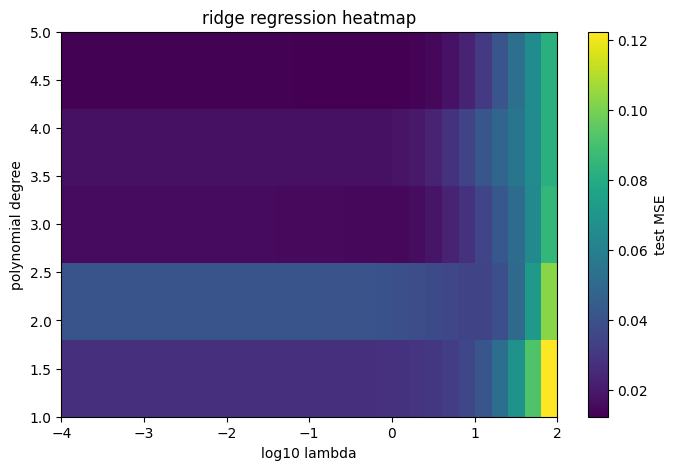

In [33]:
# (c) ridge regression, degrees 1–5, vary lambda
degrees = range(1, 6)
lambdas = np.logspace(-4, 2, 30)
mse_matrix = np.zeros((len(degrees), len(lambdas)))

for i, d in enumerate(degrees):
    for j, lam in enumerate(lambdas):
        X_train = polynomial_features(x_train, d, intercept=False)
        X_test  = polynomial_features(x_test, d, intercept=False)

        scaler = StandardScaler().fit(X_train)
        X_train_s = scaler.transform(X_train)
        X_test_s  = scaler.transform(X_test)
        y_offset = np.mean(y_train)

        beta = ridge_parameters(X_train_s, y_train, lam)

        y_pred_test = X_test_s @ beta + y_offset
        mse_matrix[i, j] = mean_squared_error(y_test, y_pred_test)

plt.figure(figsize=(8,5))
plt.imshow(mse_matrix, aspect='auto',
           extent=[np.log10(lambdas[0]), np.log10(lambdas[-1]), min(degrees), max(degrees)],
           origin='lower', cmap='viridis')
plt.colorbar(label="test MSE")
plt.xlabel("log10 lambda")
plt.ylabel("polynomial degree")
plt.title("ridge regression heatmap")
plt.show()

